In [2]:
# Seperating SATCAT into Debris and Non_Debris element

import pandas as pd

# Step 1: Read the data file (assumed to be in tab-separated format)
# Adjust the file path as needed.
file_path = "satcat.tsv"
df = pd.read_csv(file_path, sep="\t", low_memory=False)

# Check the DataFrame's column names to confirm the correct name for the coarse type.
print("Columns in the dataset:", df.columns)

# Step 2: Filter rows where the "Byte 1" field starts with "C" or "D" for debris.
# Using na=False ensures that if any entries are NaN, they will not be mistakenly flagged.
df_debris = df[df["Type"].str.startswith(("C", "D"), na=False)]

# Step 3: Create the non-debris dataset by taking the complement.
df_non_debris = df[~df["Type"].str.startswith(("C", "D"), na=False)]

# Step 4 (Optional): Save the results into separate tab-separated files.
df_debris.to_csv("debris.tsv", sep="\t", index=False)
df_non_debris.to_csv("non_debris.tsv", sep="\t", index=False)

# Print out the shapes of the datasets to confirm the split.
print("Debris dataset shape:", df_debris.shape)
print("Non-debris dataset shape:", df_non_debris.shape)


Columns in the dataset: Index(['#JCAT', 'Satcat', 'Launch_Tag', 'Piece', 'Type', 'Name', 'PLName',
       'LDate', 'Parent', 'SDate', 'Primary', 'DDate', 'Status', 'Dest',
       'Owner', 'State', 'Manufacturer', 'Bus', 'Motor', 'Mass', 'MassFlag',
       'DryMass', 'DryFlag', 'TotMass', 'TotFlag', 'Length', 'LFlag',
       'Diameter', 'DFlag', 'Span', 'SpanFlag', 'Shape', 'ODate', 'Perigee',
       'PF', 'Apogee', 'AF', 'Inc', 'IF', 'OpOrbit', 'OQUAL', 'AltNames'],
      dtype='object')
Debris dataset shape: (35598, 42)
Non-debris dataset shape: (27924, 42)


In [3]:
# Seperating total debris in orbit vs out of orbit.

df_debris_O = df_debris[df_debris["Status"] == "O"]

# Create subset for debris where Status is one of the other codes.
other_statuses = ["R", "S", "D", "L", "LF", "AS", "AR", "AR IN", "AL", "AL IN", "F", "AF"]
df_debris_other = df_debris[df_debris["Status"].isin(other_statuses)]

# Step 4: Save these two subsets to separate files.
df_debris_O.to_csv("debris_inorbit.tsv", sep="\t", index=False)
df_debris_other.to_csv("debris_outoforbit.tsv", sep="\t", index=False)

# Print out the shapes to confirm the filtering.
print("Debris dataset (Status 'O') shape:", df_debris_O.shape)
print("Debris dataset (Other statuses) shape:", df_debris_other.shape)

Debris dataset (Status 'O') shape: (12318, 42)
Debris dataset (Other statuses) shape: (22193, 42)


In [4]:
# Seperating total active elements in orbit vs out of orbit.

# Filter for non-debris where Status is exactly "O".
df_non_debris_inorbit = df_non_debris[df_non_debris["Status"] == "O"]

# Define the list of other statuses.
other_statuses = ["R", "S", "D", "L", "LF", "AS", "AR", "AR IN", "AL", "AL IN", "F", "AF"]

# Filter for non-debris with Status in the given list.
df_non_debris_outoforbit = df_non_debris[df_non_debris["Status"].isin(other_statuses)]

# Save the non-debris in orbit subset to a file.
df_non_debris_inorbit.to_csv("non_debris_inorbit.tsv", sep="\t", index=False)

# Save the non-debris out-of-orbit subset to another file.
df_non_debris_outoforbit.to_csv("non_debris_outoforbit.tsv", sep="\t", index=False)

# Print out the shapes to confirm the filtering was successful.
print("Non-debris dataset (Status 'O') shape:", df_non_debris_inorbit.shape)
print("Non-debris dataset (Other statuses) shape:", df_non_debris_outoforbit.shape)


Non-debris dataset (Status 'O') shape: (16095, 42)
Non-debris dataset (Other statuses) shape: (10180, 42)


In [5]:
# Sorting active settalites data by top 12 states for the weighted voronoi diagram.

states_counts = df_non_debris_inorbit["State"].value_counts()

# Display the top 10 for verification
print("Top 10 counts for 'State':")
print(states_counts.head(12))

# Get the top 10 states
top10_states = states_counts.head(12)

# Sum the counts for all remaining states (if there are more than 10)
others_count = states_counts.iloc[12:].sum()

# Create a dictionary from the top 10 values
voronoi_dict = top10_states.to_dict()

# Add an "others" key with the sum of all remaining counts
voronoi_dict["others"] = others_count

# Print the resulting dictionary
print("\nResulting dictionary with top 10 states and others aggregated:")
print(voronoi_dict)


Top 10 counts for 'State':
State
US    9647
SU    1554
CN    1328
RU    1039
UK     753
F      281
J      231
IN     152
D       88
CA      66
I       65
KR      56
Name: count, dtype: int64

Resulting dictionary with top 10 states and others aggregated:
{'US': 9647, 'SU': 1554, 'CN': 1328, 'RU': 1039, 'UK': 753, 'F': 281, 'J': 231, 'IN': 152, 'D': 88, 'CA': 66, 'I': 65, 'KR': 56, 'others': np.int64(835)}


In [6]:
# Sorting debris data by state.


# Get value counts for the 'State' column
deb_states_counts = df_debris_O["State"].value_counts()

# Display the top 10 for verification
print("Top 10 counts for Debris'State':")
print(deb_states_counts.head(5))

# Get the top 10 states
top10_states_deb = deb_states_counts.head(5)

# Sum the counts for all remaining states (if there are more than 10)
others_count_deb = deb_states_counts.iloc[5:].sum()

# Create a dictionary from the top 10 values
result_dict_deb = top10_states_deb.to_dict()

# Add an "others" key with the sum of all remaining counts
result_dict_deb["others"] = others_count_deb

# Print the resulting dictionary
print("\nResulting dictionary with top 10 states' debris and others aggregated:")
print(result_dict_deb)


Top 10 counts for Debris'State':
State
CN    4288
US    3888
RU    2499
SU    1173
F      307
Name: count, dtype: int64

Resulting dictionary with top 10 states' debris and others aggregated:
{'CN': 4288, 'US': 3888, 'RU': 2499, 'SU': 1173, 'F': 307, 'others': np.int64(163)}


In [7]:
# Sorting orbital debris by orbit type

import pandas as pd

# Load your TSV file
debris_in = pd.read_csv('debris_inorbit.tsv', sep='\t')

# Function to combine LEO and LLEO suborbits into one group "LEO"
def combine_leo(orbit):
    if orbit.startswith("LEO") or orbit.startswith("LLEO"):
        return "LEO"
    elif orbit.startswith("GEO"):
        return "GEO"
    elif orbit.startswith("HEO") or orbit.startswith("VHEO"):
        return "HEO"
    else:
        return orbit

# Create a new column with the combined orbit categories
debris_in['Combined_Orbit'] = debris_in['OpOrbit'].apply(combine_leo)

# Compute the value counts for the new combined orbit categories
debris_value_counts = debris_in['Combined_Orbit'].value_counts()
print("Debris count by orbit",debris_value_counts)


Debris count by orbit Combined_Orbit
LEO    10359
HEO      674
MEO      663
GTO      461
GEO      161
Name: count, dtype: int64


In [8]:
# Sorting active settelites by orbit type

import pandas as pd

# Load your TSV file
active_in = pd.read_csv('non_debris_inorbit.tsv', sep='\t')

# Function to combine LEO and LLEO suborbits into one group "LEO"
def combine_leo(orbit):
    if orbit.startswith("LEO") or orbit.startswith("LLEO"):
        return "LEO"
    elif orbit.startswith("GEO"):
        return "GEO"
    elif orbit.startswith("HEO") or orbit.startswith("VHEO"):
        return "HEO"
    else:
        return orbit

# Create a new column with the combined orbit categories
active_in['Combined_Orbit'] = active_in['OpOrbit'].apply(combine_leo)

# Compute the value counts for the new combined orbit categories
active_value_counts = active_in['Combined_Orbit'].value_counts()
print("Active Settelite count", active_value_counts)



Active Settelite count Combined_Orbit
LEO    13350
GEO     1236
MEO      631
HEO      467
GTO      382
-         28
SO         1
Name: count, dtype: int64


In [9]:
# Classifying active and debris type

active_orbit = pd.read_csv("non_debris_inorbit.tsv", sep="\t")
debris_orbit = pd.read_csv("debris_inorbit.tsv", sep="\t")

# Organization metadata (orgs.tsv with classification info)
orgs_df = pd.read_csv("orgs.tsv", sep="\t")

# === 3. Standardize Column Names ===
active_orbit.columns = active_orbit.columns.str.strip()
debris_orbit.columns = debris_orbit.columns.str.strip()
orgs_df.columns = orgs_df.columns.str.strip()

# === 4. Get All Unique Satellite Owners (up to 5000)
owner_counts = active_orbit['Owner'].value_counts().head(5000)
debris_counts = debris_orbit['Owner'].value_counts().head(5000)
all_owners_df = owner_counts.reset_index()
debris_owners_df = debris_counts.reset_index()
all_owners_df.columns = ['Owner', 'Count']
debris_owners_df.columns = ['Owner', 'Count']
# === 5. Merge With Metadata ===
classified_all = all_owners_df.merge(orgs_df, how='left', left_on='Owner', right_on='#Code')
classified_debris = debris_owners_df.merge(orgs_df, how='left', left_on='Owner', right_on='#Code')
# === 6. Map Organization Class ===
class_map = {
    'A': 'Academic / Non-profit',
    'B': 'Commercial',
    'C': 'Civil Government',
    'D': 'Military / Defense'
}
classified_all['OrgClass'] = classified_all['Class'].map(class_map).fillna('Unknown')

classified_debris['OrgClass'] = classified_debris['Class'].map(class_map).fillna('Unknown')

# === 7. Summarize and Plot ===
full_class_distribution = classified_all.groupby('OrgClass')['Count'].sum().sort_values(ascending=False)
full_debris_distribution = classified_debris.groupby('OrgClass')['Count'].sum().sort_values(ascending=False)
print("Active Settelite Type",full_class_distribution)


print("Debris in orbit Type",full_debris_distribution)


Active Settelite Type OrgClass
Commercial               10436
Military / Defense        2826
Civil Government          1759
Unknown                    745
Academic / Non-profit      329
Name: Count, dtype: int64
Debris in orbit Type OrgClass
Civil Government      6850
Military / Defense    4482
Commercial             965
Unknown                 21
Name: Count, dtype: int64


Setting default font to Arial...
Calculated Ring Radii: {'LEO': {'inner': 3.8, 'outer': 4.3}, 'MEO': {'inner': 4.45, 'outer': 4.95}, 'HEO': {'inner': 5.1000000000000005, 'outer': 5.6000000000000005}, 'GTO': {'inner': 5.750000000000001, 'outer': 6.250000000000001}, 'GEO': {'inner': 6.400000000000001, 'outer': 6.900000000000001}}
Outermost radius: 6.900000000000001
ERROR: Icon folder not found: 'icon-active'
ERROR: Icon folder not found: 'icon-debris'
ERROR: Could not load icons.
Fallback marker sizes set relative to ring width (0.5): Active=50.0, Debris=50.0
Successfully pre-loaded center image 'voronoi.png'
         ACM     ACN    Star  StarD      PL    PX      RB    Part  DebASAT  \
Year                                                                         
1957     0.0     0.0     0.0    0.0     2.0   0.0     0.0     0.0      0.0   
2024  2354.5  1628.5  6718.0  154.0  3096.0  20.0  2000.0  1481.0   2848.0   

      DebColl     Deb  Err  
Year                        
1957      0.0 

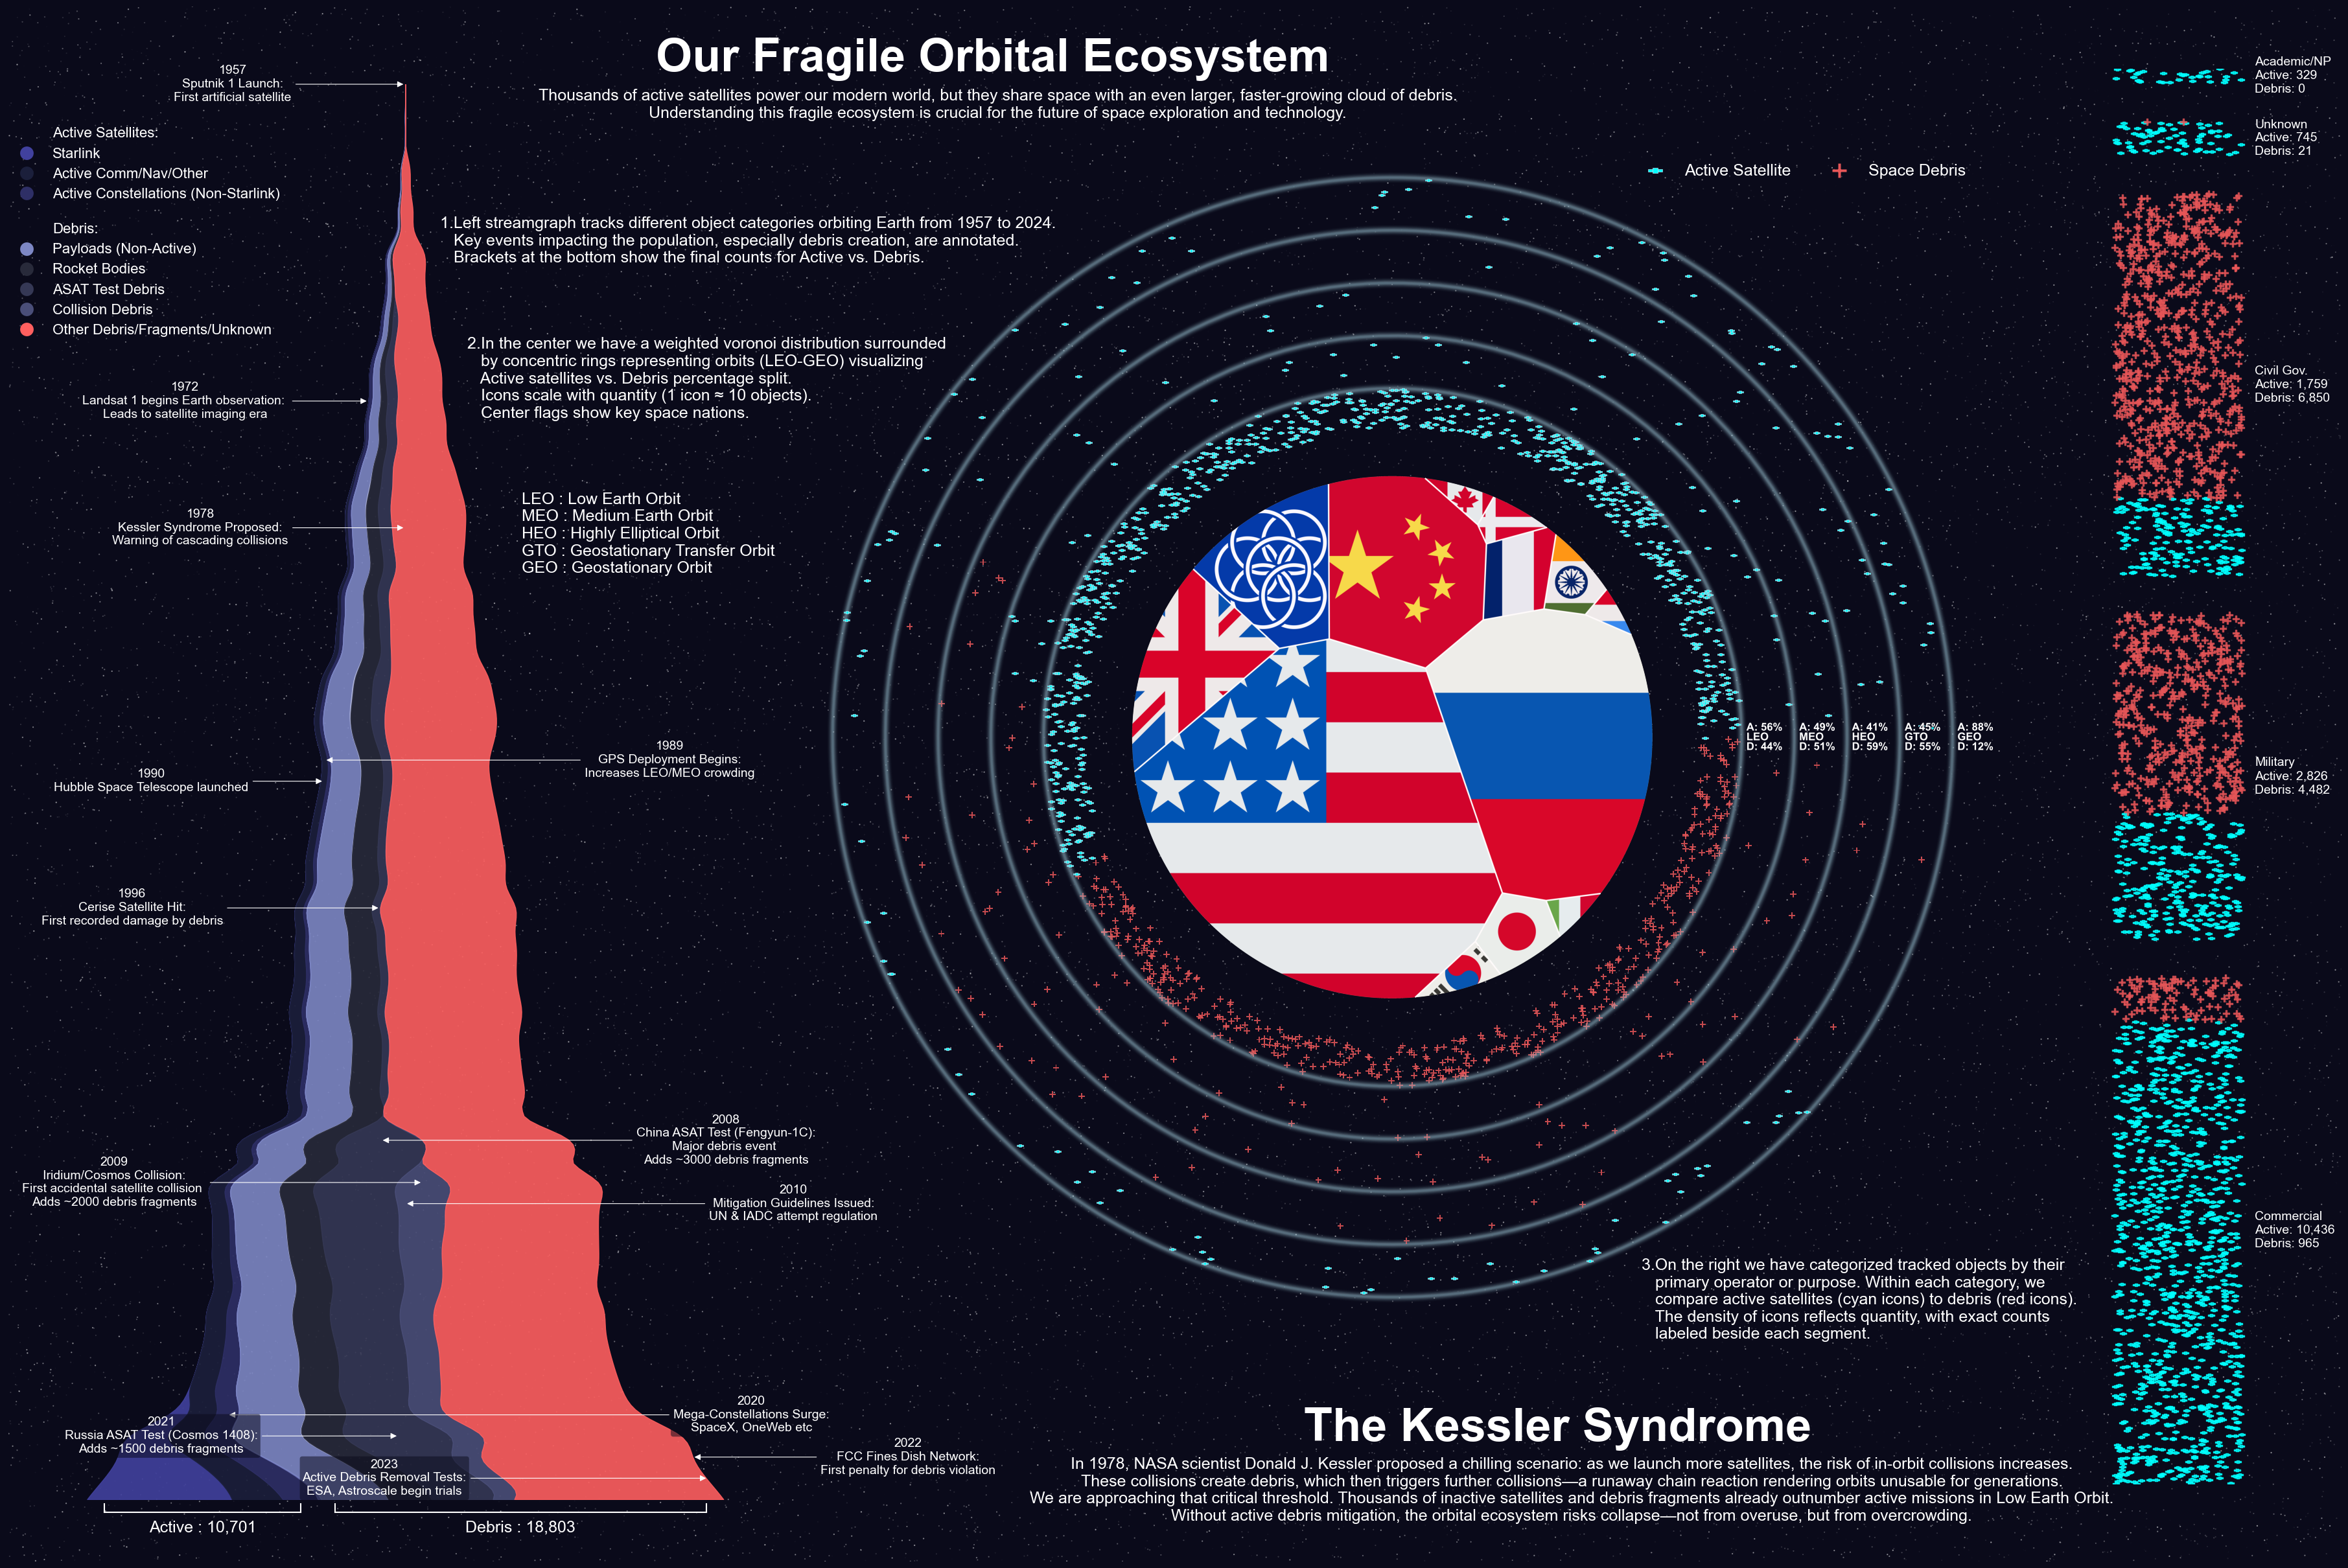

In [10]:
# --- Combined Imports ---
import matplotlib.pyplot as plt
import numpy as np
import math
import os # Needed for listing folder contents
import random # Needed for random selection
from matplotlib.path import Path # Needed for fallback markers if images fail
from matplotlib.patches import Patch, Arc # Arc needed for glow effect
import matplotlib.patheffects as PathEffects # Import PathEffects
from matplotlib.offsetbox import OffsetImage, AnnotationBbox # For placing images
import pandas as pd # Added for streamgraph data
from scipy.interpolate import make_interp_spline # Added for streamgraph smoothing
import matplotlib.ticker as ticker # <<< ADDED Import >>>


# --- Set Default Font to Arial --- VVV ADD THIS BLOCK VVV ---
print("Setting default font to Arial...")
try:
    # Set the general family to sans-serif
    plt.rcParams['font.family'] = 'sans-serif'
    # It's still good practice to have fallbacks, even if you expect Arial to work now
    plt.rcParams['font.sans-serif'] = ['Arial', 'DejaVu Sans', 'Bitstream Vera Sans', 'Verdana', 'sans-serif']
    # Optional: You might want to set default sizes too if needed later
    # plt.rcParams['font.size'] = 12 # Example default size
except Exception as e:
    print(f"Warning: Could not set Arial font using rcParams - {e}")
# --- END Font Setting ---

# ===============================================================
# == PART 1: CHART SETUP (Icons, General Parameters)         ==
# ===============================================================
# --- Using parameters from user's provided code ---
# --- Orbit Data ---
orbit_data = {
    'LEO': {'Active': 13350, 'Debris': 10359}, 'GEO': {'Active': 1236,  'Debris': 161},
    'MEO': {'Active': 631,   'Debris': 663}, 'HEO': {'Active': 467,   'Debris': 674},
    'GTO': {'Active': 382,   'Debris': 461} }
# --- Icon Scaling ---
scale_factor = 10 # User provided
# --- Concentric Ring Configuration ---
orbit_order = ['LEO', 'MEO', 'HEO', 'GTO', 'GEO']
base_inner_radius = 3.8 # User provided
ring_width = 0.5      # User provided
gap_width = 0.15      # User provided
# Calculate radii
ring_radii = {}; current_inner_radius = base_inner_radius
for orbit_name in orbit_order: current_outer_radius = current_inner_radius + ring_width; ring_radii[orbit_name] = {'inner': current_inner_radius, 'outer': current_outer_radius}; current_inner_radius = current_outer_radius + gap_width
outermost_radius = ring_radii[orbit_order[-1]]['outer']
print("Calculated Ring Radii:", ring_radii); print(f"Outermost radius: {outermost_radius}")
# --- Icon Config ---
active_icon_folder = 'icon-active'; debris_icon_folder = 'icon-debris'
zoom_active = ring_width * 0.08; zoom_debris = ring_width * 0.08 # User provided debris zoom
active_icons_list = []; debris_icons_list = []; icons_loaded = False
# (load_icons_from_folder function - same as provided)
def load_icons_from_folder(folder_path):
    loaded_icons = [];
    if not os.path.isdir(folder_path): print(f"ERROR: Icon folder not found: '{folder_path}'"); return loaded_icons
    print(f"Loading icons from '{folder_path}'..."); valid_extensions = ('.png', '.jpg', '.jpeg', '.bmp', '.gif');
    try:
        for filename in os.listdir(folder_path):
            if filename.lower().endswith(valid_extensions): file_path = os.path.join(folder_path, filename);
            try: img_data = plt.imread(file_path); loaded_icons.append(img_data)
            except Exception as e: print(f"  Warning: Failed to load image '{filename}'. Error: {e}")
    except Exception as e: print(f"ERROR: Failed to list contents of folder '{folder_path}'. Error: {e}")
    if not loaded_icons: print(f"Warning: No valid icons loaded from '{folder_path}'.")
    else: print(f"Finished loading {len(loaded_icons)} icons from '{folder_path}'.")
    return loaded_icons
active_icons_list = load_icons_from_folder(active_icon_folder); debris_icons_list = load_icons_from_folder(debris_icon_folder)
if active_icons_list and debris_icons_list: icons_loaded = True
else: print("ERROR: Could not load icons."); icons_loaded = False
# --- Fallback Markers Config ---
if not icons_loaded: # (Fallback marker setup - same as provided)
    print("WARNING: Falling back to default path markers."); sat_verts = [(-0.5,-0.5), (0.5,-0.5), (0.5,0.5), (-0.5,0.5), (-0.5,-0.5), (-1.5,-0.3), (-0.5,-0.3), (-0.5,0.3), (-1.5,0.3), (-1.5,-0.3), (0.5,-0.3), (1.5,-0.3), (1.5,0.3), (0.5,0.3), (0.5,-0.3)]; sat_codes = [Path.MOVETO,Path.LINETO,Path.LINETO,Path.LINETO,Path.CLOSEPOLY, Path.MOVETO,Path.LINETO,Path.LINETO,Path.LINETO,Path.CLOSEPOLY, Path.MOVETO,Path.LINETO,Path.LINETO,Path.LINETO,Path.CLOSEPOLY]; satellite_path = Path(sat_verts, sat_codes); deb_verts = [(-1.0,-0.2), (1.0,-0.2), (1.0,0.2), (-1.0,0.2), (-1.0,-0.2), (-0.2,-1.0), (0.2,-1.0), (0.2,1.0), (-0.2,1.0), (-0.2,-1.0)]; deb_codes = [Path.MOVETO,Path.LINETO,Path.LINETO,Path.LINETO,Path.CLOSEPOLY, Path.MOVETO,Path.LINETO,Path.LINETO,Path.LINETO,Path.CLOSEPOLY]; debris_path = Path(deb_verts, deb_codes)
    marker_size_active = ring_width * 100 # User provided
    marker_size_debris = ring_width * 100 # User provided
    print(f"Fallback marker sizes set relative to ring width ({ring_width}): Active={marker_size_active:.1f}, Debris={marker_size_debris:.1f}")
# --- Styling & Helpers ---
donut_colors = ['#00FFFF', '#e65658']; donut_glow_color = '#ADD8E6'; donut_swirl_factor = 0.3
# (generate_points_in_wedge function - same as provided)
def generate_points_in_wedge(total_icons_for_category, wedge, r_inner, r_outer, category, points_dict, swirl_factor):
    theta1, theta2 = np.deg2rad(wedge.theta1), np.deg2rad(wedge.theta2); theta1_norm = theta1 % (2 * np.pi); theta2_norm = theta2 % (2 * np.pi); full_circle = 2 * np.pi
    if theta1_norm > theta2_norm: delta_theta = (full_circle - theta1_norm) + theta2_norm; 
    else: delta_theta = abs(theta2_norm - theta1_norm)
    if delta_theta < 1e-9: angular_fraction = 0; 
    else: angular_fraction = delta_theta / full_circle
    num_points = int(round(total_icons_for_category * angular_fraction));
    if num_points == 0 and angular_fraction > 1e-6 and total_icons_for_category > 0: num_points = 1
    if num_points <= 0: return
    angles = np.array([]) # Initialize
    if theta1_norm > theta2_norm:
        ratio = ((full_circle - theta1_norm) / delta_theta) if delta_theta > 1e-9 else 0.5; num_part1 = int(num_points * ratio); num_part2 = num_points - num_part1;
        if num_part1 < 0: num_part1 = 0;
        if num_part2 < 0: num_part2 = 0;
        if num_part1 + num_part2 != num_points: num_part2 = num_points - num_part1
        angles1 = np.random.uniform(theta1_norm, full_circle, num_part1); angles2 = np.random.uniform(0, theta2_norm, num_part2); angles = np.concatenate((angles1, angles2))
        if len(angles) == 0 and num_points > 0: angles = np.random.uniform(min(theta1_norm, theta2_norm), max(theta1_norm, theta2_norm), num_points)
    else: angles = np.random.uniform(theta1_norm, theta2_norm, num_points)
    if angles.size == 0 and num_points > 0: print(f"  WARNING: Angles empty (num_points={num_points}). Skipping."); return
    if r_inner >= r_outer: r_inner = r_outer - 1e-6
    num_angles_generated = angles.size; radii_sq = np.random.uniform(r_inner**2, r_outer**2, num_angles_generated); radii = np.sqrt(radii_sq)
    r_mid = (r_inner + r_outer) / 2.0; swirl_scale = (1 / r_mid) if r_mid > 1e-6 else 0
    swirled_angles = angles + (radii - r_mid) * swirl_factor * swirl_scale
    x = radii * np.cos(swirled_angles); y = radii * np.sin(swirled_angles)
    points_dict['x'].extend(x); points_dict['y'].extend(y)
# (draw_glowing_arc function - same as provided)
def draw_glowing_arc(ax_target, center, radius, theta1, theta2, base_color, glow_color, base_lw=0.8, glow_steps=6, z_base=1): # glow_steps=6 from user code
    glow_lw_factor = 1.2;
    for i in range(glow_steps, 0, -1): lw = base_lw + i * glow_lw_factor; alpha = 0.15 * (1 - (i / glow_steps))**1.5; arc = Arc(center, radius*2, radius*2, theta1=theta1, theta2=theta2, linewidth=lw, color=glow_color, alpha=alpha, zorder=z_base+i); ax_target.add_patch(arc)
# --- Center Image Loading ---
center_img_path = 'voronoi.png'; center_img = None; center_img_loaded = False
try: # (Loading logic - same as provided)
    if os.path.exists(center_img_path): center_img = plt.imread(center_img_path); center_img_loaded = True; print(f"Successfully pre-loaded center image '{center_img_path}'")
    else: print(f"Warning: Center image file '{center_img_path}' not found.")
except Exception as e: print(f"Warning: Could not load center image '{center_img_path}'. Error: {e}.")

# ===============================================================
# == PART 2: STREAMGRAPH SETUP (Data Loading & Processing)    == # FULLY MODIFIED PART 2
# ===============================================================
stream_data_loaded = False
try:
    stream_file_path = "stat002.txt";
#    print(f"DEBUG: Attempting to read: {stream_file_path}")
    # Read the data file
    stream_data = pd.read_csv(stream_file_path, sep='\s+', skiprows=1, header=None);
    stream_data_loaded = True;
#    print(f"DEBUG: File read successfully.")

    # --- EARLY DEBUG: Check raw data read by Pandas ---
#    print(f"DEBUG: Shape of data read by read_csv: {stream_data.shape}") # (rows, columns)
#    print("DEBUG: Last 5 rows read by read_csv (before column assignment):")
#    print(stream_data.tail())
#   print("-" * 50)
    # --- END EARLY DEBUG ---

    # Define expected column names - ENSURE THIS MATCHES YOUR FILE STRUCTURE
    expected_columns = ['Bin', 'YDate', 'ACM', 'ACN', 'Star', 'StarD', 'PL', 'PX', 'RB', 'Part', 'DebASAT', 'DebColl', 'Deb', 'Err', 'Total', 'Year', 'Month', 'Day', 'Time']

    # Check column count and assign names
    if stream_data.shape[1] == len(expected_columns):
        #print(f"DEBUG: Number of columns read ({stream_data.shape[1]}) matches expected ({len(expected_columns)}). Assigning names.")
        stream_data.columns = expected_columns
    else:
        print(f"ERROR: Mismatch! Read {stream_data.shape[1]} columns but expected {len(expected_columns)}. Aborting.")
        raise ValueError(f"Column count mismatch: Read {stream_data.shape[1]}, expected {len(expected_columns)}")

    # --- DEBUG: Check data AFTER column assignment ---
#    print("DEBUG: Last 5 rows AFTER column assignment:")
#    print(stream_data.tail())
#    print("DEBUG: Data types AFTER column assignment:")
#    print(stream_data.dtypes)
#    print("DEBUG: Checking Year, Month, Day columns at end AFTER assignment:")
#    print(stream_data[['Year', 'Month', 'Day']].tail())
 #   print("-" * 50)
    # --- END DEBUG ---

    # --- Convert to Datetime for Proper Sorting ---           # <<< REVISED BLOCK >>>
#    print("DEBUG: Converting Year, Month, Day to Datetime objects...")
    try:
        # Attempt 1: Automatically parse Year, Month (name), Day
        stream_data['Date'] = pd.to_datetime(stream_data[['Year', 'Month', 'Day']])
   #     print("DEBUG: Automatic datetime conversion successful.")

    except ValueError as e:
 #       print(f"DEBUG: Automatic date parsing failed: {e}. Attempting manual mapping...")
        # Attempt 2: Manual mapping for month names/abbreviations
        try:
            # --- DEFINE MONTH MAPPING ---
            # IMPORTANT: Check your stat002.txt file and ensure the keys here EXACTLY match
            # the abbreviations used in the 'Month' column (e.g., 'Jan', 'Feb', 'Mar'...)
            month_map = {
                'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6,
                'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12
            }
            # --------------------------

            # Check if all unique month strings in the data are present in the map
            unique_months = stream_data['Month'].unique()
            #print(f"DEBUG: Unique 'Month' values found in data: {unique_months}")
            missing_months = [m for m in unique_months if m not in month_map]
            if missing_months:
                 # Throw a clear error if the map is incomplete
                 #print(f"ERROR: Month strings {missing_months} not found in month_map! Please update the dictionary in the code.")
                 raise ValueError(f"Unrecognized month strings found: {missing_months}")

            # Apply the mapping to create a numerical month column
            stream_data['MonthNum'] = stream_data['Month'].map(month_map)

            # Create Date column using Year, MonthNum, Day
 #           print("DEBUG: Creating 'Date' column using mapped MonthNum...")
            # Pass a dictionary to to_datetime specifying column names
            stream_data['Date'] = pd.to_datetime({
                'year': stream_data['Year'],
                'month': stream_data['MonthNum'],
                'day': stream_data['Day']
            })
#            print("DEBUG: Manual datetime conversion successful.")

            # Optional: Check the new 'Date' column type and last values
#            print("DEBUG: Data types after manual conversion:")
            #print(stream_data.dtypes)
#            print("DEBUG: Tail of data after manual conversion:")
            #print(stream_data[['Year', 'Month', 'Day', 'MonthNum', 'Date']].tail()) # Show original and new Date

        except Exception as map_e:
             # If manual mapping also fails, print error and stop
             print(f"ERROR: Manual month mapping or subsequent datetime conversion failed: {map_e}")
             raise # Re-raise error
    #print("-" * 50)
    # --- END Datetime Conversion ---
    
    # Ensure Year column is integer type (might be redundant after date extraction but safe)
    stream_data['Year'] = stream_data['Year'].astype(int);

    # --- DEBUG: Check last entries for specific years BEFORE grouping (using Date sort) ---
#    print("\nDEBUG: Checking original data's last entries for specific years (AFTER date conversion and sorting)...")
    try:
        # Sort by the new 'Date' column for correct chronological order
#        print("DEBUG: Sorting data by 'Date' column...")
        sorted_stream_data = stream_data.sort_values('Date') # <<< SORT BY THE NEW 'Date' COLUMN

        # --- DEBUG: Check sorting results ---
#        print("DEBUG: Last 5 rows AFTER sorting by 'Date':")
#        print(sorted_stream_data[['Date', 'ACM', 'ACN', 'Star', 'Total']].tail()) # Verify dates are now correct
#        print("-" * 50)
        # --- END DEBUG ---

        # Check specific years from the correctly sorted data
        for year_to_check in [1957, 2024]:
#            print(f"DEBUG: Last 3 entries for Year {year_to_check} in sorted data:")
            # Use original 'Year' column for filtering
            last_entries = sorted_stream_data[sorted_stream_data['Year'] == year_to_check].tail(3)
#            print(last_entries[['Date', 'ACM', 'ACN', 'Star', 'Total']]) # Show 'Date' column
#            print("-" * 30)
    except Exception as e:
        print(f"DEBUG: Error checking original data - {e}")
    # --- END DEBUG ---

    # --- Grouping Step ---
    # Group by the original 'Year' column, using the Date-sorted data
    # .tail(1) now correctly selects the row with the latest date for each year
#    print("DEBUG: Grouping by Year and taking tail(1)...")
    grouped_data = (sorted_stream_data
                      .groupby('Year') # Group by the original integer Year column
                      .tail(1)
                      # Select only the numeric data columns needed + error column for merging
                      .set_index('Year')[['ACM', 'ACN', 'Star', 'StarD', 'PL', 'PX', 'RB', 'Part', 'DebASAT', 'DebColl', 'Deb', 'Err']])
#    print("DEBUG: Grouping complete.")
    # --- END Grouping Step ---

    # --- DEBUG: Check the single row selected by '.groupby().tail(1)' ---
    # This should now show the correct Dec 31st (or latest) entries
#    print("\nDEBUG: Checking the single row selected by '.groupby().tail(1)' for specific years...")
    try:
        years_to_show = [1957, 2024]
        # Use .loc and .index.intersection to safely select rows
        selected_rows = grouped_data.loc[grouped_data.index.intersection(years_to_show)]
        if not selected_rows.empty:
             print(selected_rows)
        else:
             print(f"DEBUG: No data found in grouped_data for years {years_to_show}")
    except Exception as e:
        print(f"DEBUG: Error checking grouped_data - {e}")
    print("-" * 50)
    # --- END DEBUG ---

    # --- Continue with Data Processing ---
#    print("DEBUG: Merging Part, Deb, Err columns...")
    grouped_data_with_merged = grouped_data.copy()
    grouped_data_with_merged['Part+Deb+Err'] = grouped_data[['Part', 'Deb', 'Err']].sum(axis=1)
#    print("DEBUG: Merging complete.")

    # Define final columns for the streamgraph
    stream_final_columns = ['Star', 'ACM', 'ACN', 'StarD', 'PL', 'PX', 'RB', 'DebASAT', 'DebColl', 'Part+Deb+Err']
#    print(f"DEBUG: Final columns for streamgraph: {stream_final_columns}")

    # Define year range and filter the yearly data
    year_min, year_max = 1957, 2024 # Define desired plotting range
    grouped_data_with_merged.index = grouped_data_with_merged.index.astype(int); # Ensure index is integer for .loc filtering
#    print(f"DEBUG: Filtering data for years {year_min} to {year_max}...")
    grouped_data_filtered = grouped_data_with_merged.loc[year_min:year_max]
#    print(f"DEBUG: Shape of filtered data (grouped_data_filtered): {grouped_data_filtered.shape}")
#    print("DEBUG: Index of filtered data:", grouped_data_filtered.index.tolist())


    # --- Color Assignment --- (No changes needed here)
#    print("DEBUG: Assigning colors...")
    stream_colors_palette = ["#1b1f3b", "#2e2f66", "#41419e", "#6569af", "#7d87c4", "#b0b5da", "#282a3a", "#1c1e2f", "#353855", "#4a4e78", "#6b70a2", "#9aa0c5"];
    stream_final_colors = [];
    original_cols = list(grouped_data.columns); # Use columns *before* merge for original color mapping
    for col in stream_final_columns:
        if col == 'Part+Deb+Err': stream_final_colors.append('#ff5f5f') # Specific color for merged
        elif col in original_cols: stream_final_colors.append(stream_colors_palette[original_cols.index(col) % len(stream_colors_palette)])
        else: stream_final_colors.append(stream_colors_palette[len(stream_final_colors) % len(stream_colors_palette)]) # Fallback color
#    print(f"DEBUG: Assigned {len(stream_final_colors)} colors.")


    # --- Smoothing --- (No changes needed here, but added check)
#    print("DEBUG: Preparing data for smoothing...")
    x = grouped_data_filtered.index.values
    if len(x) < 2:
         print("ERROR: Not enough data points after filtering to perform smoothing. Skipping streamgraph.")
         # Handle this case - maybe set stream_data_loaded = False?
         raise ValueError("Insufficient data points for smoothing after filtering.")

    x_smooth = np.linspace(x.min(), x.max(), 300); # Increase points for smoother curve if needed
    smoothed_values = [];
#    print("DEBUG: Smoothing data for each stream...")
    for col in stream_final_columns:
        y = grouped_data_filtered[col].values;
        k_spline = min(3, len(x) - 1) # Ensure k is valid (k < number of points)

        if k_spline < 1: # Cannot spline with less than 2 points
            print(f"DEBUG: Using linear interpolation for '{col}' (k<1)")
            smoothed_values.append(np.interp(x_smooth, x, y))
        else:
            try:
                 # Ensure x is monotonically increasing for spline
                if not np.all(np.diff(x) > 0):
#                    print(f"DEBUG: Sorting x/y for spline interpolation for '{col}'")
                    sort_indices = np.argsort(x);
                    x_sorted, y_sorted = x[sort_indices], y[sort_indices];
                    # Check again after sorting
                    if not np.all(np.diff(x_sorted) > 0):
#                         print(f"DEBUG: Duplicate x values found for '{col}' after sorting, using linear interpolation.")
                         smoothed_values.append(np.interp(x_smooth, x_sorted, y_sorted)) # Interpolate on sorted
                    else:
                         spline = make_interp_spline(x_sorted, y_sorted, k=k_spline);
                         smoothed_values.append(spline(x_smooth))
                else:
                    spline = make_interp_spline(x, y, k=k_spline);
                    smoothed_values.append(spline(x_smooth))
            except ValueError as e:
#                print(f"DEBUG: Spline interpolation failed for '{col}': {e}. Using linear interpolation.")
                smoothed_values.append(np.interp(x_smooth, x, y)) # Fallback to linear interpolation

    smoothed_values = np.array(smoothed_values);
    # Ensure no negative values after smoothing (can happen with splines)
    smoothed_values[smoothed_values < 0] = 0;
#    print("DEBUG: Smoothing complete.")

    # Calculate baseline and offsets for plotting
    baseline_smooth = np.sum(smoothed_values, axis=0) / 2.0;
    offsets_smooth = np.cumsum(smoothed_values, axis=0) - smoothed_values / 2.0 - baseline_smooth
#    print("DEBUG: Baseline and offsets calculated.")
    stream_data_loaded = True # Confirm data is loaded and processed

except FileNotFoundError:
    print(f"ERROR: Streamgraph data file not found: '{stream_file_path}'"); stream_data_loaded = False
except Exception as e:
    print(f"ERROR: Failed to load/process streamgraph data in PART 2: {e}"); stream_data_loaded = False
    # Optional: re-raise the exception if you want the script to stop on error
    # raise

# ===============================================================
# ===============================================================
# == PART 3: PLOT SETUP (Figure, Background, Axes Layout)    ==
# ===============================================================
# (Layout definition remains the same: stream left, donut center, bar right)
fig = plt.figure(figsize=(36, 24));
fig.patch.set_facecolor('#0a0a1a');
ax_bg = fig.add_axes([0, 0, 1, 1], zorder=0);
ax_bg.set_facecolor('#0a0a1a');
ax_bg.set_xlim(0, 1);
ax_bg.set_ylim(0, 1);
ax_bg.axis('off');
num_stars = 25000;
star_x = np.random.rand(num_stars);
star_y = np.random.rand(num_stars);
star_sizes = np.random.rand(num_stars) * 2.0; 
star_alphas = np.random.rand(num_stars) * 0.5;
ax_bg.scatter(star_x, star_y, s=star_sizes, c='white', alpha=star_alphas, marker='.')

left_margin = 0.02; right_margin = 0.02; 
top_margin = 0.05; bottom_margin = 0.04
stream_left = left_margin; stream_bottom = bottom_margin;
stream_width = 0.30;
stream_height = 1 - top_margin - bottom_margin;
ax_stream = fig.add_axes([stream_left, stream_bottom, stream_width, stream_height], facecolor='none', zorder=1)
bar_left = 1 - right_margin - 0.08; 
bar_bottom = bottom_margin + 0.01; 
bar_width_ax = 0.06; bar_height_ax = 1 - top_margin - bottom_margin;

ax_stacked_bar = fig.add_axes([bar_left, bar_bottom, bar_width_ax, bar_height_ax], facecolor='none', zorder=5) # Renamed axes variable

donut_area_left = stream_left + stream_width + 0.01;
donut_area_right = bar_left - 0.01;
donut_area_width = donut_area_right - donut_area_left;
donut_disp_width = 0.9; donut_disp_height = 0.85; 
donut_width_f = donut_area_width * donut_disp_width; 
donut_height_f = (1 - top_margin - bottom_margin) * donut_disp_height; 

# <<< CHANGE: Modify calculation for donut_left >>>
# Shift left by using a smaller multiplier (e.g., 0.4) instead of 0.5 (which is / 2)
shift_factor = 0.20 # Value < 0.5 shifts left, > 0.5 shifts right from center
donut_left = donut_area_left + (donut_area_width - donut_width_f) * shift_factor
# <<< END CHANGE >>>

donut_bottom = (1 - donut_height_f) / 2 + 0.03;
ax_donut = fig.add_axes([donut_left, donut_bottom, donut_width_f, donut_height_f], aspect='equal', facecolor='none', zorder=10); ax_donut.axis('off')


# ===============================================================
# == PART 4: DRAW CONCENTRIC DONUT RINGS                     ==
# ===============================================================
# (Donut drawing code remains the same as provided - truncated)
# Uses base_inner_radius=3.5, ring_width=0.3 etc. from Part 1
org_classes = [ 'Commercial', 'Military', 'Civil Gov.', 'Unknown', 'Academic/NP' ]
active_values = [10436, 2826, 1759, 745, 329]
debris_values = [965, 4482, 6850, 21, 0]

print("\n--- Drawing Concentric Donut Rings ---")
donut_plot_limit = outermost_radius * 1.05 # Adjusted limit slightly
ax_donut.set_xlim(-donut_plot_limit, donut_plot_limit); ax_donut.set_ylim(-donut_plot_limit, donut_plot_limit); ax_donut.set_aspect('equal', adjustable='box')
for orbit_name in orbit_order: # (Loop and data fetching - truncated)
    counts = orbit_data.get(orbit_name);
    if not counts or not isinstance(counts, dict) or 'Active' not in counts or 'Debris' not in counts: continue
    radii = ring_radii.get(orbit_name);
    if not radii: continue
    r_inner_w = radii['inner']; r_outer_w = radii['outer']
    active_count = counts.get('Active', 0); debris_count = counts.get('Debris', 0); total_count = active_count + debris_count
    if total_count == 0: draw_glowing_arc(ax_donut, (0,0), r_outer_w, 0, 360, 'grey', donut_glow_color, base_lw=0.5, glow_steps=12, z_base=ax_donut.get_zorder()+1); continue # Using glow_steps=6 from user
    orbit_percentages = np.array([active_count / total_count, debris_count / total_count]) * 100; num_active_icons = int(round(active_count / scale_factor)); num_debris_icons = int(round(debris_count / scale_factor))
    points_active = {'x': [], 'y': []}; points_debris = {'x': [], 'y': []}; plotted_indices = []; start_angle = 0
    for i in range(len(orbit_percentages)): # (Segment drawing and point generation - truncated)
         percentage = orbit_percentages[i];
         if percentage <= 0: continue
         angle_extent = percentage * 3.6; end_angle = start_angle + angle_extent; theta1, theta2 = start_angle, end_angle
         draw_glowing_arc(ax_donut, (0,0), r_outer_w, theta1, theta2, 'white', donut_glow_color, glow_steps=12, z_base=ax_donut.get_zorder()+1) # Outer edge only, glow_steps=6
         dummy_wedge = lambda: None; dummy_wedge.theta1 = theta1; dummy_wedge.theta2 = theta2; category = 'active' if i == 0 else 'debris'
         total_icons = num_active_icons if category == 'active' else num_debris_icons; points_dict = points_active if category == 'active' else points_debris
         generate_points_in_wedge(total_icons, dummy_wedge, r_inner_w, r_outer_w, category, points_dict, donut_swirl_factor)
         plotted_indices.append(i); start_angle = end_angle
    current_zorder_base = ax_donut.get_zorder() + (orbit_order.index(orbit_name) + 1) # (Icon/marker plotting - truncated)
    if icons_loaded:
        if 1 in plotted_indices: # Debris
            try:
                for x, y in zip(points_debris['x'], points_debris['y']): img_data = random.choice(debris_icons_list); ab = AnnotationBbox(OffsetImage(img_data, zoom=zoom_debris, alpha=0.85), (x, y), frameon=False, pad=0, zorder=current_zorder_base + 2); ax_donut.add_artist(ab)
            except Exception as e: print(f"    Error during debris plotting: {e}")
        if 0 in plotted_indices: # Active
            try:
                for x, y in zip(points_active['x'], points_active['y']): img_data = random.choice(active_icons_list); ab = AnnotationBbox(OffsetImage(img_data, zoom=zoom_active, alpha=1.0), (x, y), frameon=False, pad=0, zorder=current_zorder_base + 3); ax_donut.add_artist(ab)
            except Exception as e: print(f"    Error during active plotting: {e}")
    else: # Fallback
        if 1 in plotted_indices: ax_donut.scatter(points_debris['x'], points_debris['y'], marker=debris_path, s=marker_size_debris, facecolor=donut_colors[1], edgecolor='none', zorder=current_zorder_base + 2, alpha=0.85)
        if 0 in plotted_indices: ax_donut.scatter(points_active['x'], points_active['y'], marker=satellite_path, s=marker_size_active, facecolor=donut_colors[0], edgecolor=donut_glow_color, linewidths=0.5, zorder=current_zorder_base + 3)
    start_angle = 0 # (Text/Label placement - truncated)
    for i in range(len(orbit_percentages)): display_percentage = orbit_percentages[i];
    if display_percentage <= 0: continue; angle_extent = display_percentage * 3.6; mid_angle_deg = start_angle + angle_extent / 2.0; mid_angle_rad = np.deg2rad(mid_angle_deg); start_angle += angle_extent; text_r = (r_inner_w + r_outer_w) / 2.0; font_size_perc = max(6, int(ring_width * 10)); ax_donut.text(text_r * np.cos(mid_angle_rad), text_r * np.sin(mid_angle_rad), f'{display_percentage:.0f}%', ha='center', va='center', color='white', fontsize=font_size_perc, fontweight='bold', zorder=current_zorder_base + 5, path_effects=[PathEffects.withStroke(linewidth=1.5, foreground='#0a0a1a')])
    label_angle_rad = np.deg2rad(0); 
    label_radius = r_outer_w + gap_width * 0.4;
    font_size_label = max(12, int(ring_width * 12)); 

    active_perc = orbit_percentages[0]
    debris_perc = orbit_percentages[1]
    label_text = f"A: {active_perc:.0f}%\n{orbit_name}\nD: {debris_perc:.0f}%"
    ax_donut.text(label_radius * np.cos(label_angle_rad), label_radius * np.sin(label_angle_rad), label_text,
                  ha='left', va='center', color='white', fontsize=12, fontweight='bold',
                  zorder=current_zorder_base + 6, rotation=0, linespacing=1.0, # Adjust linespacing if needed
                  path_effects=[PathEffects.withStroke(linewidth=1.5, foreground='#0a0a1a')])
    
# (Center Image code - uses base_inner_radius=3.5)
center_img_display_radius = base_inner_radius * 0.85 # User provided factor
center_zorder = ax_donut.get_zorder() + (len(orbit_order) + 1) * 10
if center_img_loaded and center_img is not None: ax_donut.imshow(center_img, extent=[-center_img_display_radius, center_img_display_radius, -center_img_display_radius, center_img_display_radius], aspect='equal', zorder=center_zorder)
else: center_placeholder_radius = base_inner_radius * 0.7; center_circle = plt.Circle((0, 0), center_placeholder_radius, color='#1a1a3a', ec=donut_glow_color, lw=1.0, zorder=center_zorder); ax_donut.add_patch(center_circle)
if not center_img_loaded: ax_donut.text(0, 0, "Img\nErr", ha='center', va='center', fontsize=8, color='red', zorder=center_zorder+1, fontweight='bold')


# ===============================================================
# == PART 4.5: DRAW ORG COMPARISON (Single Bar - SCATTER FILL)== # MODIFIED FOR STRETCHING
# ===============================================================
print("\n--- Drawing Org Comparison (Single Bar - Scatter Fill) ---")
print(f"--- Using scale_factor={scale_factor}. Low values can be slow! ---")

# --- Add a vertical stretch factor ---
vertical_stretch_factor = 1.5 # Value > 1 stretches, < 1 compresses. Adjust as needed (e.g., 1.5, 2.0)
print(f"    Applying vertical stretch factor: {vertical_stretch_factor}")
# ------------------------------------

# Ensure data are numpy arrays
active_values_np = np.array(active_values)
debris_values_np = np.array(debris_values)

x_pos = 0  # Single position on x-axis for the bar
bar_width = 0.8 # Width of the area where markers are scattered

# Gap height between class segments - Calculate based on ORIGINAL height
original_total_data_height = sum(active_values_np) + sum(debris_values_np)
original_gap_height = original_total_data_height * 0.030
# Apply stretch factor to the gap height used for plotting
gap_height_plot = original_gap_height * vertical_stretch_factor
print(f"    Using stretched gap height: {gap_height_plot:.1f} (Original: {original_gap_height:.1f})")


current_bottom = 0 # This will track the stretched bottom position
# total_height_incl_gaps = 0 # We'll calculate stretched version later

# Define scatter plot parameters (remain the same)
scatter_kwargs_active = {
    's': marker_size_active, 'marker': satellite_path, 'color': donut_colors[0],
    'alpha': 0.85, 'zorder': 6, 'clip_on': True }
scatter_kwargs_debris = {
    's': marker_size_debris, 'marker': debris_path, 'color': donut_colors[1],
    'alpha': 0.75, 'zorder': 6, 'clip_on': True }

# Loop through classes to stack segments using scatter
for i, org_class in enumerate(org_classes):
    # Get ORIGINAL data heights
    active_h = active_values_np[i]
    debris_h = debris_values_np[i]

    # --- Calculate STRETCHED heights for plotting ---
    active_h_plot = active_h * vertical_stretch_factor
    debris_h_plot = debris_h * vertical_stretch_factor
    segment_total_h_plot = active_h_plot + debris_h_plot
    # ---------------------------------------------

    # Add stretched gap BEFORE processing a new class segment (except the first one)
    if i > 0:
        current_bottom += gap_height_plot # Use stretched gap

    data_segment_bottom = current_bottom # Store bottom before adding data heights

    # --- Scatter for Active segment ---
    num_active_markers = int(round(active_h / scale_factor)) # Number based on original height
    if num_active_markers > 0:
        # Use stretched heights for Y coordinates
        y_min_act = current_bottom
        y_max_act = current_bottom + active_h_plot # Use stretched height
        x_min = x_pos - bar_width / 2
        x_max = x_pos + bar_width / 2
        x_act_pts = np.random.uniform(x_min, x_max, num_active_markers)
        y_act_pts = np.random.uniform(y_min_act, y_max_act, num_active_markers)
        ax_stacked_bar.scatter(x_act_pts, y_act_pts, **scatter_kwargs_active)

    current_bottom += active_h_plot # Update bottom using stretched height

    # --- Scatter for Debris segment ---
    num_debris_markers = int(round(debris_h / scale_factor)) # Number based on original height
    if num_debris_markers > 0:
        # Use stretched heights for Y coordinates
        y_min_deb = current_bottom
        y_max_deb = current_bottom + debris_h_plot # Use stretched height
        x_min = x_pos - bar_width / 2
        x_max = x_pos + bar_width / 2
        x_deb_pts = np.random.uniform(x_min, x_max, num_debris_markers)
        y_deb_pts = np.random.uniform(y_min_deb, y_max_deb, num_debris_markers)
        ax_stacked_bar.scatter(x_deb_pts, y_deb_pts, **scatter_kwargs_debris)

    current_bottom += debris_h_plot # Update bottom using stretched height

    # --- Add Org Class Label to the side ---
    # Position label based on STRETCHED segment midpoint
    label_y_pos = data_segment_bottom + segment_total_h_plot / 2
    # Label text shows ORIGINAL values
    label_text = f"{org_class}\nActive: {active_h:,}\nDebris: {debris_h:,}"
    ax_stacked_bar.text(x_pos + bar_width * 0.6 , label_y_pos, label_text, # Adjusted x position
                      ha='left', va='center', color='white', fontsize=14, zorder=7, # Changed alignment
                      )

# Calculate final STRETCHED height
total_height_incl_gaps_plot = current_bottom

# --- Set Y-limit for the bar chart axes using STRETCHED height ---
ax_stacked_bar.set_ylim(0, total_height_incl_gaps_plot)
# -------------------------------------------------------------

# --- Styling Bar Chart Area (remains the same) ---
ax_stacked_bar.tick_params(axis='y', left=False, labelleft=False)
ax_stacked_bar.spines['left'].set_color('none')
ax_stacked_bar.spines['bottom'].set_color('none')
ax_stacked_bar.spines['top'].set_color('none')
ax_stacked_bar.spines['right'].set_color('none')
ax_stacked_bar.set_xticks([])
ax_stacked_bar.tick_params(axis='x', length=0)
ax_stacked_bar.set_facecolor('none')

# ===============================================================
# == PART 5: DRAW STREAMGRAPH ELEMENTS (Rotated & No Spines) ==
# ===============================================================
# (Streamgraph plotting code remains the same)

# --- Streamgraph Annotation Data ---
# Place this definition maybe at the beginning of PART 5 or near PART 1
stream_annotations = [
    {
        'year': 1957, 'xy_year': 1957, 'text': "1957\nSputnik 1 Launch:\nFirst artificial satellite",
        'target_stream': 'Bottom', # Point to the bottom edge of the whole stream
        'text_offset_xy': (-8000, -0)  # Example: Text left and slightly down from target point
    },
    {
        'year': 1972 , 'xy_year': 1972 , 'text': "1972\nLandsat 1 begins Earth observation: \nLeads to satellite imaging era",
        'target_stream': 'Bottom', # Point to the bottom edge of the whole stream
        'text_offset_xy': (-8500, -0)  # Example: Text left and slightly down from target point
    },
    {
        'year': 1978, 'xy_year': 1978, 'text': "1978\nKessler Syndrome Proposed:\nWarning of cascading collisions",
        'target_stream': 'Center', # Point to x=0 line
        'text_offset_xy': (-9500, 0)  # Example: Text far left and up
    },
    {
        'year': 1989, 'xy_year': 1989, 'text': "1989\nGPS Deployment Begins:\nIncreases LEO/MEO crowding",
        'target_stream': 'ACM',   # Point to the center of the 'ACM' stream
        'text_offset_xy': (16000, 0)  # Example offset
    },
    {
        'year': 1990, 'xy_year': 1990, 'text': "1990\nHubble Space Telescope launched",
        'target_stream': 'ACM',   # Point to the center of the 'ACM' stream
        'text_offset_xy': (-8000, 0)  # Example offset
    },
    {
        'year': 1996, 'xy_year': 1996, 'text': "1996\nCerise Satellite Hit:\nFirst recorded damage by debris",
        'target_stream': 'DebColl',# Point to center of 'DebColl' stream
        'text_offset_xy': (-11500, 0) # Example offset
    },
    {   'year': 2007, 'xy_year': 2007, 'text': "2008\nChina ASAT Test (Fengyun-1C):\nMajor debris event \nAdds ~3000 debris fragments",
        'target_stream': 'DebASAT', # Point to center of 'DebASAT' stream
        'text_offset_xy': (+16000, 0) # Example offset
    },
    {   'year': 2009, 'xy_year': 2009, 'text': "2009\nIridium/Cosmos Collision:\nFirst accidental satellite collision \nAdds ~2000 debris fragments",
        'target_stream': 'DebColl', # Point to center of 'DebColl' stream
        'text_offset_xy': (-14300, 0)  # Example offset
    },
    {   'year': 2010, 'xy_year': 2010, 'text': "2010\nMitigation Guidelines Issued:\nUN & IADC attempt regulation",
        'target_stream': 'Center', # Point to center line
        'text_offset_xy': (+18000, 0) # Example offset
    },
    {   'year': 2020.5, 'xy_year': 2020, 'text': "2020\nMega-Constellations Surge:\nSpaceX, OneWeb etc",
        'target_stream': 'ACN',  # Point to center of 'ACN' stream (e.g.)
        'text_offset_xy': (+24300, 0) # Example offset
    },
    {   'year': 2021, 'xy_year': 2021, 'text': "2021\nRussia ASAT Test (Cosmos 1408):\nAdds ~1500 debris fragments",
        'target_stream': 'DebASAT', # Point to center of 'DebASAT'
        'text_offset_xy': (-11000, -0) # Example offset
    },
    {   'year': 2022, 'xy_year': 2022, 'text': "2022\nFCC Fines Dish Network:\nFirst penalty for debris violation",
        'target_stream': 'Total', # Point to the top edge of the whole stream
        'text_offset_xy': (10000, 0)  # Example offset
    },
    {   'year': 2023.5, 'xy_year': 2023, 'text': "2023\nActive Debris Removal Tests:\nESA, Astroscale begin trials",
        'target_stream': 'Total', # Point to the top edge
        'text_offset_xy': (-15000, 0) # Example offset
     }
]

if stream_data_loaded:
    print("\nPlotting ROTATED streamgraph...")
    # ... (existing streamgraph plotting: fill_betweenx) ...
    for i in range(len(stream_final_columns)): x_left = offsets_smooth[i] - smoothed_values[i] / 2.0; x_right = offsets_smooth[i] + smoothed_values[i] / 2.0; y_years = x_smooth; ax_stream.fill_betweenx(y_years, x_left, x_right, color=stream_final_colors[i], alpha=0.9, zorder=ax_stream.get_zorder() + i + 1)

    # --- Streamgraph Styling (Axis setup, tick setup) ---
    ax_stream.yaxis.tick_left();
    ax_stream.tick_params(axis='y', colors='white', labelsize=12, rotation=0, direction='in', pad=-35, left=False, labelleft=False);
    ax_stream.set_ylim(x_smooth.min(), x_smooth.max());
    ax_stream.invert_yaxis()
    max_pos_x = np.max(offsets_smooth + smoothed_values / 2.0); 
    min_neg_x = np.min(offsets_smooth - smoothed_values / 2.0);
    max_abs_x = max(max_pos_x, abs(min_neg_x)); 
    step = 5000;
    if max_abs_x < step: step = max(100, np.ceil(max_abs_x / 4))
    pos_ticks_x = np.arange(0, max_abs_x + step, step); 
    neg_ticks_x = -pos_ticks_x[1:]; all_tick_positions_x = np.unique(np.concatenate([neg_ticks_x, pos_ticks_x])); all_tick_labels_x = [f'{abs(int(t)):,}' for t in all_tick_positions_x]
    ax_stream.set_xticks(all_tick_positions_x);
    ax_stream.set_xticklabels(all_tick_labels_x);
    ax_stream.set_xlim(min_neg_x * 1.1, max_pos_x * 1.1);
    ax_stream.tick_params(axis='x', colors='white', labelsize=12, rotation=45, direction='in', pad=-35, bottom=False, labelbottom=False)

    # --- Add Annotations to Streamgraph (Enhanced Control) --- <<< MODIFIED SECTION >>>
    print("Adding streamgraph annotations (year on arrow)...")
    annotation_color = '#E0E0E0'; arrow_color = 'white' # Slightly lighter arrow?
    year_text_color = 'yellow'
    year_text_bgcolor = '#0a0a1a' # Match figure background
    year_text_fontsize = 6.5

    year_on_arrow_fontsize = 14    # Adjust size as needed (e.g., 8, 9, 10)
    year_on_arrow_color = 'white'   # Color for the year text
    year_on_arrow_bgcolor = '#0a0a1a' # MUST match figure background exactly
    year_on_arrow_alpha = 1.0   # Use 1.0 for opaque background to hide arrow line
 
    
    # Pre-calculate edges and centers if needed
    all_x_left = offsets_smooth - smoothed_values / 2.0
    all_x_right = offsets_smooth + smoothed_values / 2.0
    stream_centers = offsets_smooth # Center of each individual stream layer
    stream_min_x_values = np.min(all_x_left, axis=0) # Overall left edge
    stream_max_x_values = np.max(all_x_right, axis=0) # Overall right edge (top edge before rotation)

    for ann in stream_annotations:
        year = ann['year']
        event_text = ann['text']
        point_to_y = ann.get('xy_year', year) # The year arrow points to
        target_stream = ann.get('target_stream', 'Center') # Default to center line
        text_offset = ann.get('text_offset_xy', (-10000, 0)) # Default offset if missing

        year_val_raw = ann.get('xy_year', ann['year']) # Get the year value used for positioning
        year_val_display = int(np.floor(year_val_raw)) # Get integer year for display

        # Check if the year is within the plotted range
        limit1, limit2 = ax_stream.get_ylim(); actual_min_year = min(limit1, limit2); actual_max_year = max(limit1, limit2)
        if not (actual_min_year <= point_to_y <= actual_max_year):
             print(f"  Skipping annotation for {year}: Year {point_to_y} out of plot range [{actual_min_year:.1f}, {actual_max_year:.1f}].")
             continue

        # Find index in smoothed data closest to the target year
        idx = np.abs(x_smooth - point_to_y).argmin()

        # Calculate the target x-coordinate based on target_stream
        point_to_x = 0 # Default to center
        try:
            if target_stream == 'Center':
                point_to_x = 0
            elif target_stream == 'Total': # Use overall top (rightmost) edge
                 point_to_x = stream_max_x_values[idx]
            elif target_stream == 'Bottom': # Use overall bottom (leftmost) edge
                 point_to_x = stream_min_x_values[idx]
            elif target_stream in stream_final_columns:
                stream_idx = stream_final_columns.index(target_stream)
                # Point to the center x-coordinate of the specific stream layer
                point_to_x = stream_centers[stream_idx, idx]
            else:
                 print(f"  Warning: Unknown target_stream '{target_stream}' for year {year}. Pointing to center.")
                 point_to_x = 0
        except IndexError:
             print(f"  Warning: Could not find data index for year {point_to_y}. Pointing to center.")
             point_to_x = 0
        except ValueError:
             print(f"  Warning: target_stream name '{target_stream}' not found in columns. Pointing to center.")
             point_to_x = 0


        # Define arrow start point
        xy = (point_to_x, point_to_y)
        # Define text position using the offset from the arrow start point
        xytext = (point_to_x + text_offset[0], point_to_y + text_offset[1])

        # Use manual y-offset tweaks if needed (can be integrated into text_offset_xy)
        # if year == 1978: text_y += 2 # Example - better to adjust text_offset_xy[1]
        # ... other manual tweaks could be applied to xytext[1] ...


        # Use a simple straight arrow
        arrowprops=dict(arrowstyle='-|>', # Arrow head style
                        # connectionstyle='arc3,rad=0', # Ensure straight
                        color=arrow_color,
                        lw=0.8)

        ax_stream.annotate(event_text,
                           xy=xy,
                           xycoords='data',
                           xytext=xytext,
                           textcoords='data',
                           fontsize=14, color='white', ha='center', va='center',
                           arrowprops=arrowprops,
                           bbox=dict(boxstyle='round,pad=0.2', fc='#0a0a1a', alpha=0.5, ec='none'),
                           zorder=ax_stream.get_zorder() + 100
                          )
        

    # --- Hide Spines (After adding annotations) ---
    ax_stream.spines['top'].set_visible(False);
    ax_stream.spines['right'].set_visible(False); ax_stream.spines['bottom'].set_visible(False); ax_stream.spines['left'].set_visible(False)

    print("Finished plotting rotated streamgraph.")
else:
    # ... (Error handling remains the same) ...
    print("Skipping streamgraph plotting."); 
    ax_stream.text(0.5, 0.5, "Streamgraph data\ncould not be loaded.", ha='center', va='center', fontsize=16, color='red', transform=ax_stream.transAxes); ax_stream.tick_params(color='none', labelcolor='none')

# ===============================================================
# == PART 6: OVERALL FIGURE ELEMENTS (Titles, Text)          == # ADDING EXPLANATORY TEXT
# ===============================================================
fig.suptitle('Our Fragile Orbital Ecosystem                            ', fontsize=52, color='white', y=0.98, fontweight='bold') # Keep main title

# --- Define Text Content ---
intro_text = "Thousands of active satellites power our modern world, but they share space with an even larger, faster-growing cloud of debris.\nUnderstanding this fragile ecosystem is crucial for the future of space exploration and technology."

# Remember to replace {scale_factor} with its actual value, e.g., 10
how_to_read_text = """
1.Left streamgraph tracks different object categories orbiting Earth from 1957 to 2024. \n   Key events impacting the population, especially debris creation, are annotated.\n   Brackets at the bottom show the final counts for Active vs. Debris. \n \n \n \n \n      2.In the center we have a weighted voronoi distribution surrounded
         by concentric rings representing orbits (LEO-GEO) visualizing \n         Active satellites vs. Debris percentage split. \n         Icons scale with quantity (1 icon ≈ 10 objects). \n         Center flags show key space nations. \n\n\n\n\n                  LEO : Low Earth Orbit\n                  MEO : Medium Earth Orbit\n                  HEO : Highly Elliptical Orbit\n                  GTO : Geostationary Transfer Orbit\n                  GEO : Geostationary Orbit""" # Slightly reworded

# Customize this as needed
#credits_text = "Data Source: [Your Data Source, e.g., ESA DISCOS / space-track.org] (Data as of Early 2025) | Visualization by [Your Name/Group]"

# --- Add Text Blocks using Invisible Axes ---
# NOTE: Adjust [left, bottom, width, height] and fontsize values as needed by visual inspection!

print("Adding explanatory text blocks...")

# 1. Introduction Text (Below Title)
try:
    intro_left = 0.2
    intro_bottom = 0.89 # Positioned high, just below suptitle
    intro_width = 0.80 # Span most of the width
    intro_height = 0.06
    ax_intro = fig.add_axes([intro_left, intro_bottom, intro_width, intro_height], facecolor='none', zorder=20)
    ax_intro.axis('off')
    ax_intro.text(0.28, 0.95, intro_text, # Center horizontally, anchor near top
                 ha='center', va='top', wrap=True, transform=ax_intro.transAxes,
                 color='white', fontsize=18) # Slightly larger font for intro
except Exception as e:
    print(f"Error adding intro text: {e}")

# 2. Left
try:
    explain_left = 0.185
    explain_bottom = 0.80 # Below the intro box
    explain_width = 0.40
    explain_height = 0.08 # Needs enough height for 3-4 lines
    ax_explain = fig.add_axes([explain_left, explain_bottom, explain_width, explain_height], facecolor='none', zorder=20)
    ax_explain.axis('off')
    ax_explain.text(0, 0.95, how_to_read_text, # Anchor top-left
                   ha='left', va='top', wrap=True, transform=ax_explain.transAxes,
                   color='white', fontsize=18) # Standard explanatory font size
except Exception as e:
    print(f"Error adding 'how to read' text: {e}")

print("  Finished adding text blocks.")
# --- END Text Blocks ---
print("Adding text for Bar Chart...")
try:
    # Text content specifically for the bar chart (Option 1)
    bar_text = """3.On the right we have categorized tracked objects by their \n   primary operator or purpose. Within each category, we \n   compare active satellites (cyan icons) to debris (red icons). \n   The density of icons reflects quantity, with exact counts \n   labeled beside each segment."""

    # Define position [left, bottom, width, height] in FIGURE coordinates (0-1)
    # Place it in the bottom-right area
    bar_text_left = 0.70         # Start 68% from the left (adjust as needed)
    bar_text_bottom = 0.10        # Place low (align vertically with others)
    bar_text_width = 0.15         # Adjust width to fit reasonably in the right area
    bar_text_height = 0.10         # Adjust height based on text length/wrapping

    # Create invisible axes for the text
    ax_bar_text = fig.add_axes([bar_text_left, bar_text_bottom, bar_text_width, bar_text_height], facecolor='none', zorder=20)
    ax_bar_text.axis('off') # Hide axes lines/ticks

    # Add text, anchored top-left, wrap=True
    ax_bar_text.text(0, 0.95, # x=0 (left edge), y=0.95 (near top edge of this text axes)
                     bar_text,
                     ha='left',
                     va='top',
                     wrap=True,
                     transform=ax_bar_text.transAxes, # Use coordinates relative to ax_bar_text
                     color='white',   # Explanatory text color
                     fontsize=18)   # Adjust vertical space between lines
    print("  Added bar chart text.")
except Exception as e:
    print(f"Error adding bar chart text: {e}")

# --- ADD KESSLER SYNDROME TEXT (Bottom Right) --- # <<< MODIFIED PLACEMENT >>>
print("Adding Kessler Syndrome context text (Bottom Right)...")
try:
    # Kessler text content (same as before)
    kessler_text = """In 1978, NASA scientist Donald J. Kessler proposed a chilling scenario: as we launch more satellites, the risk of in-orbit collisions increases.\nThese collisions create debris, which then triggers further collisions—a runaway chain reaction rendering orbits unusable for generations.\nWe are approaching that critical threshold. Thousands of inactive satellites and debris fragments already outnumber active missions in Low Earth Orbit.\nWithout active debris mitigation, the orbital ecosystem risks collapse—not from overuse, but from overcrowding."""

    # --- ADJUST THESE COORDINATES FOR BOTTOM-RIGHT ---
    # Define position [left, bottom, width, height] in FIGURE coordinates
    kessler_text_left = 0.67      # Start near the right side
    kessler_text_bottom = 0.01     # Place low on figure (align with other bottom text?)
    kessler_text_width = 0.10      # Width to fit in the right margin area
    kessler_text_height = 0.06     # Allocate enough height for paragraph (adjust!)
    # --- END ADJUSTABLE COORDINATES ---

    # Create invisible axes
    ax_kessler_text = fig.add_axes([kessler_text_left, kessler_text_bottom, kessler_text_width, kessler_text_height], facecolor='none', zorder=20)
    ax_kessler_text.axis('off')

# --- VVV ADD TITLE TO THIS AXES VVV ---
    ax_kessler_text.set_title(
        "The Kessler Syndrome                    ",  # The heading text
        color='white',          # Heading color
        fontsize=52,            # Heading font size (larger than description)
        fontweight='bold',      # Make heading bold
        pad=13                 # Padding between title and text below (adjust)
    )

    # Add text, anchored top-left, wrap=True
    ax_kessler_text.text(0, 0.95, # Anchor near top-left of its box
                         kessler_text,
                         ha='center',
                         va='top',
                         wrap=True,
                         transform=ax_kessler_text.transAxes,
                         color='white',
                         fontsize=18)
    print("  Added Kessler Syndrome text (Bottom Right).")
except Exception as e:
    print(f"Error adding Kessler Syndrome text: {e}")
# --- END KESSLER SYNDROME TEXT ---



# ===============================================================
# == PART 6.5: ADD LEGENDS AND END-OF-STREAM BRACKETS          == # <<< FULLY REVISED SECTION >>>
# ===============================================================
print("\nAdding Legends and Brackets...")
from matplotlib.lines import Line2D
# Note: Patch might not be needed anymore if only Line2D is used for handles
# from matplotlib.patches import Patch
import numpy as np # Needed for bracket calculations

# --- Legend 1: Donut Chart Markers (Active/Debris) ---
print("  Processing Legend 1 (Donut Markers)...")
legend_marker_size = 16 # Size for this legend

marker_handles = [
    Line2D([0], [0], marker=satellite_path, color='white', # Use fallback marker paths
           label='Active Satellite', linestyle='None',
           markersize=legend_marker_size,
           markerfacecolor=donut_colors[0],
           markeredgecolor=donut_glow_color,
           markeredgewidth=0.5),
    Line2D([0], [0], marker=debris_path, color='w',
           label='Space Debris', linestyle='None',
           markersize=legend_marker_size,
           markerfacecolor=donut_colors[1],
           markeredgecolor='none')
]

# Place Legend 1 in Top-Right of Donut Axes
ax_donut.legend(handles=marker_handles,
                loc='upper right', # Standard placement within the axes corner
                # bbox_to_anchor=(1.0, 1.0), # Optional: Fine-tune if needed
                ncol=2,
                fontsize=18,
                labelcolor='white',
                frameon=False, # No frame/background
               # title='Object Type Key', # Optional title for this legend
                title_fontsize=14)

print(f"  Added Marker Legend (Top Right within Donut Axes).")
# --- END LEGEND 1 ---


# --- Legend 2: Streamgraph Categories (Split with Titles & Brackets) ---
print("  Processing Legend 2 (Streamgraph Categories) and End Brackets...")
if stream_data_loaded:
    # --- Define Custom Legend Names ---
    custom_legend_names = {
        'Star': 'Starlink',
        'ACM': 'Active Comm/Nav/Other',
        'ACN': 'Active Constellations (Non-Starlink)',
        'StarD': 'Starlink Debris', # Will be hidden from legend
        'PL': 'Payloads (Non-Active)',
        'PX': 'Payload Mission Obj.', # Will be hidden from legend
        'RB': 'Rocket Bodies',
        'DebASAT': 'ASAT Test Debris',
        'DebColl': 'Collision Debris',
        'Part+Deb+Err': 'Other Debris/Fragments/Unknown'
    }
    # --- Define Categories for Splitting ---
    active_original_cols = {'Star', 'ACM', 'ACN'}
    debris_original_cols = {'PL', 'RB', 'DebASAT', 'DebColl', 'Part+Deb+Err'}

    # --- Filter invisible and explicitly hidden streams ---
    visibility_threshold = 1e-3
    stream_sums = np.sum(np.abs(smoothed_values), axis=1)
    visible_stream_indices = [i for i, s_sum in enumerate(stream_sums) if s_sum > visibility_threshold]

    hidden_original_names = {'StarD', 'PX'} # Original names to hide from legend
    final_legend_indices = [
        i for i in visible_stream_indices
        if stream_final_columns[i] not in hidden_original_names
    ]

    # --- Create categorized handles for Legend 2---
    active_handles = []
    debris_handles = []
    legend_marker_size_stream = 15 # Size of circle markers

    for i in final_legend_indices:
        original_col_name = stream_final_columns[i]
        label_text = custom_legend_names.get(original_col_name, original_col_name)
        # Create Line2D handle with circle marker
        handle = Line2D([0], [0], marker='o', markersize=legend_marker_size_stream,
                        markerfacecolor=stream_final_colors[i], markeredgecolor='none',
                        linestyle='None', label=label_text)
        # Assign to the correct category list
        if original_col_name in active_original_cols:
            active_handles.append(handle)
        elif original_col_name in debris_original_cols:
            debris_handles.append(handle)

    # --- Create Dummy Title Handles for Legend 2---
    active_title_handle = Line2D([0], [0], marker='', linestyle='None', color='none',
                                 label='\n\nActive Satellites:')
    debris_title_handle = Line2D([0], [0], marker='', linestyle='None', color='none',
                                 label='\nDebris:')

    # --- Combine Handles in Order for Legend 2---
    stream_handles_for_legend = [] # Use a distinct name
    num_active_items_in_legend = 0
    num_debris_items_in_legend = 0
    if active_handles:
        stream_handles_for_legend.append(active_title_handle)
        stream_handles_for_legend.extend(active_handles)
        num_active_items_in_legend = len(active_handles) + 1 # +1 for title
    if debris_handles:
        stream_handles_for_legend.append(debris_title_handle)
        stream_handles_for_legend.extend(debris_handles)
        num_debris_items_in_legend = len(debris_handles) + 1 # +1 for title

    # --- Place Legend 2 INSIDE the streamgraph axes (ax_stream) ---
    if stream_handles_for_legend:
        legend = ax_stream.legend(handles=stream_handles_for_legend,
                                  loc='upper left',
                                  bbox_to_anchor=(-0.08,1),
                                  ncol=1,
                                  fontsize=16,
                                  labelcolor='white',
                                  frameon=False) # No frame or title for the overall legend box
        print(f"    Added Split Streamgraph Legend ({len(active_handles)} Active, {len(debris_handles)} Debris items).")

        # --- ADD BRACKETS AND COMBINED TOTALS AT END OF STREAMGRAPH DATA --- # <<< MODIFIED TEXT >>>
        print("    Adding brackets and combined totals to end of streamgraph data...")

        idx_end = -1; year_end = x_smooth[idx_end] # End year position

        # --- Calculate Totals from Original Data ---
        # Initialize totals and display text defaults
        total_active_end = 0; total_debris_end = 0
        active_display_text = "Active : N/A"; debris_display_text = "Debris : N/A"
        show_totals = False

        if not grouped_data_filtered.empty:
            last_data_row = grouped_data_filtered.iloc[-1]
            latest_year_orig_data = last_data_row.name
            # Use the specific sets defined for TOTALS
            # --- VVV DEFINE SETS FOR TOTAL CALCULATION VVV --- <<< ADD THESE LINES BACK >>>
            # Define categories EXPLICITLY for summation for totals
            active_cols_for_total = {'Star', 'ACM', 'ACN'}
            # Use the definition that includes ALL relevant debris categories for the total count
            debris_cols_for_total = {'PL', 'RB', 'DebASAT', 'DebColl', 'Part+Deb+Err', 'StarD', 'PX'}
            print(f"DEBUG: Columns being summed for ACTIVE total: {sorted(list(active_cols_for_total))}")
            print(f"DEBUG: Columns being summed for DEBRIS total: {sorted(list(debris_cols_for_total))}")
            # --- END DEFINITION ---
            
            for col_name in active_cols_for_total:
                if col_name in last_data_row.index: total_active_end += last_data_row[col_name]
            for col_name in debris_cols_for_total:
                 if col_name in last_data_row.index: total_debris_end += last_data_row[col_name]

            # Format the combined strings (Rounding before int conversion)
            active_display_text = f"Active : {int(round(total_active_end)):,}"
            debris_display_text = f"Debris : {int(round(total_debris_end)):,}"
            print(f"DEBUG: Totals for brackets (Year {latest_year_orig_data}): {active_display_text}, {debris_display_text}")
            show_totals = True
        else:
             print("DEBUG: Cannot calculate totals: grouped_data_filtered is empty.")


        # Create mapping from column name to index (for smoothed data span)
        col_name_to_index = {name: i for i, name in enumerate(stream_final_columns)}

        # --- Calculate span for Active group (from smoothed data) ---
        min_x_active = np.inf; max_x_active = -np.inf; active_streams_found_at_end = False
        for col_name in active_cols_for_total: # Use total set for span calculation
            if col_name in col_name_to_index:
                i = col_name_to_index[col_name]
                # Check index is valid for smoothed_values/offsets_smooth arrays
                if i < smoothed_values.shape[0]:
                    active_streams_found_at_end = True
                    stream_height = smoothed_values[i, idx_end]
                    if stream_height > 1e-6:
                         stream_offset = offsets_smooth[i, idx_end]
                         x_left = stream_offset - stream_height / 2.0; x_right = stream_offset + stream_height / 2.0
                         min_x_active = min(min_x_active, x_left); max_x_active = max(max_x_active, x_right)

        # --- Calculate span for Debris group (from smoothed data) ---
        min_x_debris = np.inf; max_x_debris = -np.inf; debris_streams_found_at_end = False
        for col_name in debris_cols_for_total: # Use total set for span calculation
             if col_name in col_name_to_index:
                i = col_name_to_index[col_name]
                # Check index is valid
                if i < smoothed_values.shape[0]:
                     debris_streams_found_at_end = True
                     stream_height = smoothed_values[i, idx_end]
                     if stream_height > 1e-6:
                         stream_offset = offsets_smooth[i, idx_end]
                         x_left = stream_offset - stream_height / 2.0; x_right = stream_offset + stream_height / 2.0
                         min_x_debris = min(min_x_debris, x_left); max_x_debris = max(max_x_debris, x_right)

        # --- Define Bracket and Text Style Parameters ---
        bracket_color = 'white'
        bracket_lw = 1.5
        y_offset = 0.6              # How many 'years' above the end year to draw the bracket line
        tick_height = 0.4           # How many 'years' the vertical ticks extend down
        bracket_shrinkage = 800     # Amount to shrink bracket horizontally from each end
        combined_label_fontsize = 18  # Font size for combined text "Category : Count"
        total_label_y_gap = -0.8     # Gap below bracket ticks for the combined text

        y_bracket = year_end + y_offset
        y_tick_end = max(year_end, y_bracket - tick_height) # Ensure tick doesn't go below end year line visually
        total_label_y_pos = y_tick_end - total_label_y_gap # Y position for combined text

        # --- Draw Active Bracket and Combined Text ---
        if active_streams_found_at_end and np.isfinite(min_x_active) and np.isfinite(max_x_active) and min_x_active < max_x_active:
            current_span_active = max_x_active - min_x_active
            active_bracket_start_x = min_x_active
            active_bracket_end_x = max_x_active
            if current_span_active > 2 * bracket_shrinkage:
                 active_bracket_start_x += bracket_shrinkage
                 active_bracket_end_x -= bracket_shrinkage

            # Draw bracket lines
            ax_stream.plot([active_bracket_start_x, active_bracket_end_x], [y_bracket, y_bracket], color=bracket_color, lw=bracket_lw, clip_on=False)
            ax_stream.plot([active_bracket_start_x, active_bracket_start_x], [y_bracket, y_tick_end], color=bracket_color, lw=bracket_lw, clip_on=False)
            ax_stream.plot([active_bracket_end_x, active_bracket_end_x], [y_bracket, y_tick_end], color=bracket_color, lw=bracket_lw, clip_on=False)

            # Draw COMBINED "Active : Count" label below bracket ticks
            if show_totals:
                 ax_stream.text(
                     (active_bracket_start_x + active_bracket_end_x) / 2, # Centered horizontally
                     total_label_y_pos,                                  # Y position below ticks
                     active_display_text,                                # The combined text string
                     ha='center',                                        # Center horizontally
                     va='top',                                           # Anchor top of text at y position
                     color=bracket_color,
                     fontsize=combined_label_fontsize                    # Use combined font size
                 )
            print(f"      Drawing Active bracket from x={active_bracket_start_x:.0f} to x={active_bracket_end_x:.0f}")
        else:
            print("      Skipping Active bracket (no valid span found at end year).")

        # --- Draw Debris Bracket and Combined Text ---
        if debris_streams_found_at_end and np.isfinite(min_x_debris) and np.isfinite(max_x_debris) and min_x_debris < max_x_debris:
            current_span_debris = max_x_debris - min_x_debris
            debris_bracket_start_x = min_x_debris
            debris_bracket_end_x = max_x_debris
            if current_span_debris > 2 * bracket_shrinkage:
                 debris_bracket_start_x += bracket_shrinkage
                 debris_bracket_end_x -= bracket_shrinkage

            # Draw bracket lines
            ax_stream.plot([debris_bracket_start_x, debris_bracket_end_x], [y_bracket, y_bracket], color=bracket_color, lw=bracket_lw, clip_on=False)
            ax_stream.plot([debris_bracket_start_x, debris_bracket_start_x], [y_bracket, y_tick_end], color=bracket_color, lw=bracket_lw, clip_on=False)
            ax_stream.plot([debris_bracket_end_x, debris_bracket_end_x], [y_bracket, y_tick_end], color=bracket_color, lw=bracket_lw, clip_on=False)

            # Draw COMBINED "Debris : Count" label below bracket ticks
            if show_totals:
                ax_stream.text(
                    (debris_bracket_start_x + debris_bracket_end_x) / 2, # Centered horizontally
                    total_label_y_pos,                                  # Y position below ticks
                    debris_display_text,                                # The combined text string
                    ha='center',                                        # Center horizontally
                    va='top',                                           # Anchor top of text at y position
                    color=bracket_color,
                    fontsize=combined_label_fontsize                    # Use combined font size
                )
            print(f"      Drawing Debris bracket from x={debris_bracket_start_x:.0f} to x={debris_bracket_end_x:.0f}")
        else:
             print("      Skipping Debris bracket (no valid span found at end year).")
        # --- END BRACKETS AND COMBINED TOTALS --- # <<< END OF CHANGED SNIPPET >>>


    else: # Corresponds to 'if stream_handles_for_legend:'
        print("    Skipping Streamgraph Legend and Brackets (no visible/non-hidden streams found for legend).")

else: # Corresponds to 'if stream_data_loaded:'
    print("  Skipping Streamgraph Legend and Brackets (stream data not loaded).")

# --- END LEGEND 2 and BRACKETS ---
# ===============================================================
# == PART 7: SAVE OR SHOW PLOT                                 ==
# ===============================================================
output_filename = 'Infographic_Our_Fragile_Orbital_Ecosystem.png' # Updated filename
try:
    plt.savefig(output_filename, facecolor=fig.get_facecolor(), dpi=150, bbox_inches='tight')
    print(f"\nInfographic saved as '{output_filename}'")
except Exception as e:
    print(f"Error saving figure: {e}")

plt.show()